In [26]:
%pylab inline
matplotlib.rcParams['figure.figsize'] = (10,6)
from gdsctools import *

Populating the interactive namespace from numpy and matplotlib


In [27]:
gdsc = ANOVA(ic50_test)

INFO:root:Reading data and building data structures


In [28]:
gdsc.tissue_factor.unique()

array(['lung_NSCLC', 'prostate', 'stomach', 'nervous_system', 'skin',
       'Bladder', 'leukemia', 'kidney', 'thyroid', 'soft_tissue',
       'aero_dig_tract', 'ovary', 'lymphoma', 'myeloma', 'endometrium',
       'pancreas', 'breast', 'neuroblastoma', 'large_intestine', 'cervix',
       'liver', 'bone', 'lung_SCLC', 'lung', 'biliary_tract',
       'urogenital_system_other', 'testis'], dtype=object)

In [29]:
print(gdsc)

Number of drugs: 11
Number of cell lines: 988
Percentage of NA 0.206569746043

Genomic features distribution
Number of unique tissues 27
Here are first 10 tissues: lung_NSCLC, prostate, stomach, nervous_system, skin, Bladder, leukemia, kidney, thyroid, soft_tissue

There are 677 unique features distributed as
- Mutation: 270
- CNA (gain): 116
- CNA (loss): 291


There are 27 different tissues in this original data

## Select sub set of cancers

What about an analysis on only stomach and pancreas:

In [39]:

gdsc.set_cancer_type(['stomach', 'pancreas'])

In [40]:
print(gdsc)

Number of drugs: 11
Number of cell lines: 61
Percentage of NA 0.241430700447

Genomic features distribution
Number of unique tissues 2
Here are the tissues: stomach,pancreas

There are 467 unique features distributed as
- Mutation: 119
- CNA (gain): 107
- CNA (loss): 241


The number of cell lines has decreased significanly, which is expected.
Also, the number of features has decreased! 

Indeed, features that do not have at least 1 positive or 1
negative. Note that later, further features may be ignored based on the content of the settings.featFactorPopulationTh

In [41]:
# because we have more than one tissue, the analysis type is still PANCAN
gdsc.settings.analysis_type

'PANCAN'

In [42]:
results = gdsc.anova_one_drug_one_feature('Drug_1047_IC50', 'ACACA_mut', 
                                     show=True)

In [43]:
# Nothing happens here, let us look at the content of the result
results

,ANOVA_FEATURE_FDR_%,DRUG_ID,DRUG_NAME,DRUG_TARGET,FEATURE,FEATURE_ANOVA_pval,FEATURE_IC50_T_pval,FEATURE_IC50_effect_size,FEATURE_deltaMEAN_IC50,FEATUREneg_Glass_delta,...,FEATUREpos_Glass_delta,FEATUREpos_IC50_sd,FEATUREpos_logIC50_MEAN,MSI_ANOVA_pval,N_FEATURE_neg,N_FEATURE_pos,TISSUE_ANOVA_pval,assoc_ID,log max.Conc.tested,log max.Conc.tested2
1,None,Drug_1047_IC50,None,None,ACACA_mut,None,None,None,None,None,...,NaN,NaN,NaN,NaN,50,1,NaN,NaN,NaN,NaN


most of the columns are NA. This means that nothing was computed. Most probably because the MSI or 
feature balance are not good enough

Let us try another feature

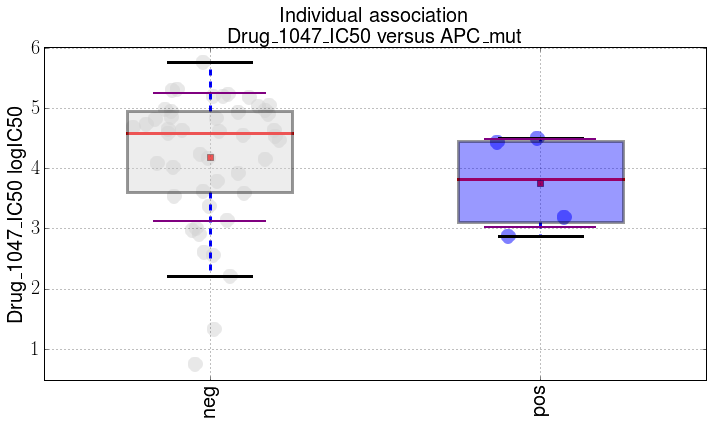

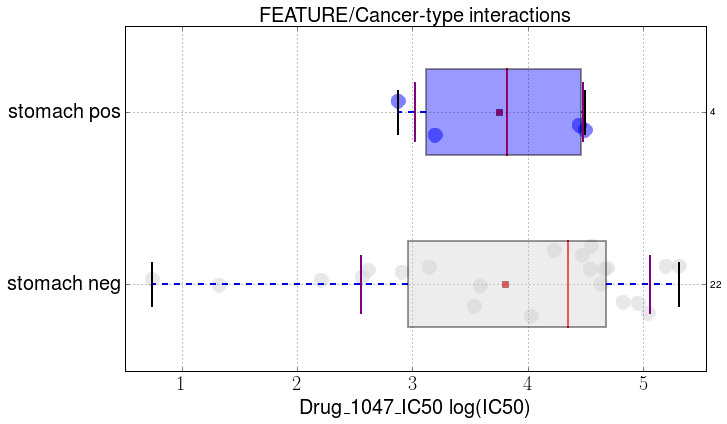

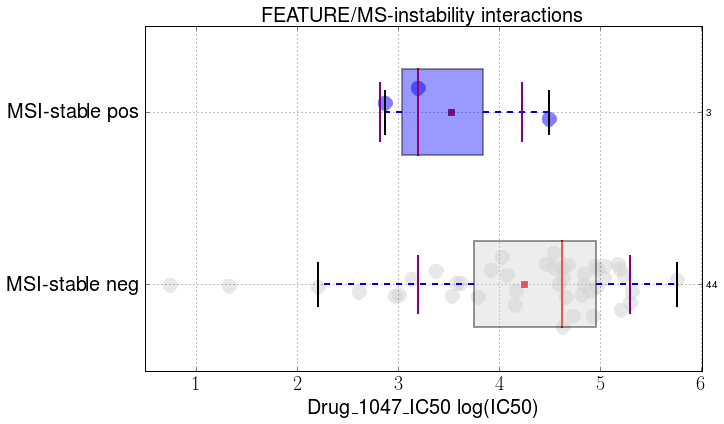

In [44]:
results = gdsc.anova_one_drug_one_feature('Drug_1047_IC50', 'APC_mut', 
                                     show=True)

## Cancer Specific

In [45]:
gdsc.set_cancer_type('stomach')

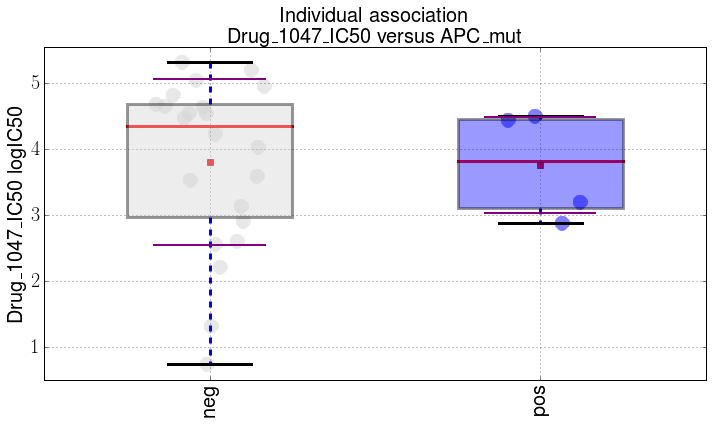

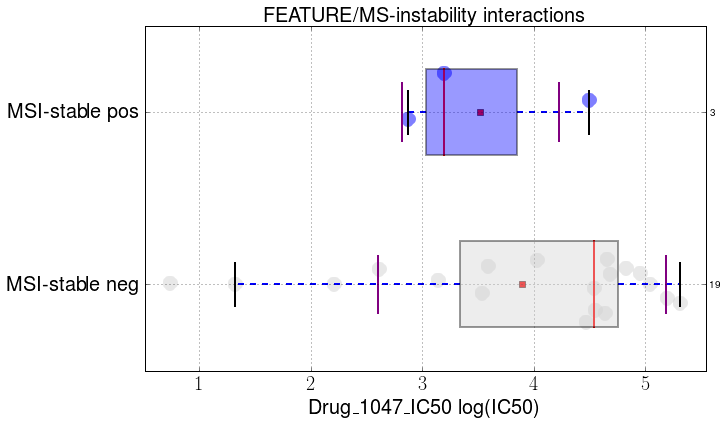

In [46]:
results = gdsc.anova_one_drug_one_feature('Drug_1047_IC50', 'APC_mut', 
                                     show=True)

note that there are only 2 boxplots now since the tissue-specific factor has been dropped

<hr>
<ht>
**Author: Thomas Cokelaer, Nov 2015**